# **Entrega 1**

Airbnb es una plataforma en línea que sirve para conectar a viajeros con anfitriones que ofrecen alojamientos. Es una de las plataformas más populares del mercado, lo que significa que mucha gente tiene confianza en que tanto sus datos personales como la información presente en la plataforma sea verificada y protegida. Es de vital importancia para Airbnb analizar sus datos e identificar las actividades fraudulentas, así pueden tomar medidas proactivas de seguridad, proteger a sus usuarios y prevenir pérdidas financieras.

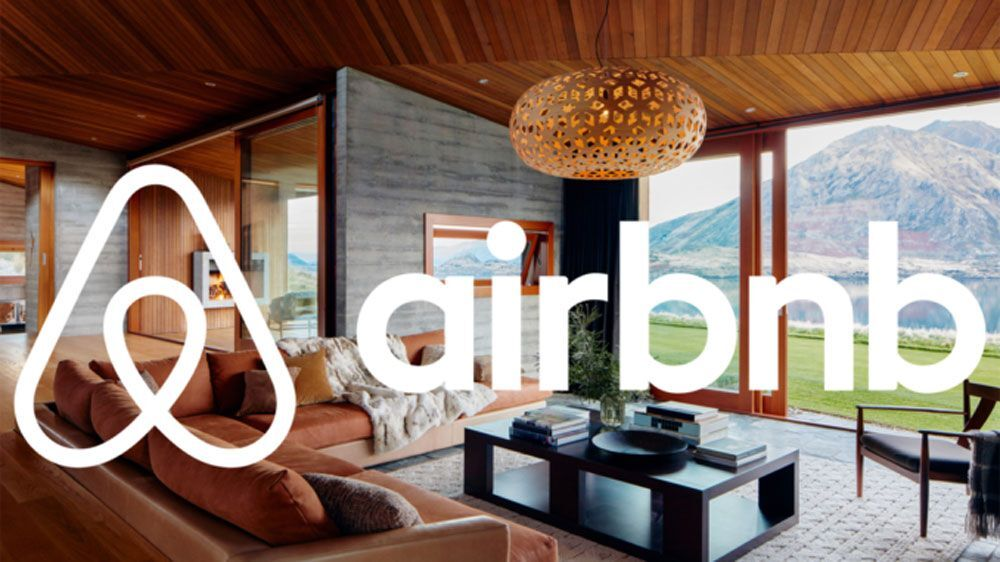

## **Definir hipótesis / pregunta para el analisis del proyecto.**
La pregunta a la cual llegamos luego de las primeras aproximaciones con el dataset fue ¿Puede la variación de los precios de alquiler en Airbnb por sí sola, indicar la presencia de fraudes y prácticas engañosas en la plataforma?. Existe una variable llamada `fraud`, que determina si un hospedaje es o no un fraude, pero esta variable está condicionada por otras variables, como si hubiese un estándar que determina su validez o hubiesen datos más realistas que otros. Si dejamos de considerar esta última condición, ¿podríamos determinar, con relaciones entre variables si se trata de una estafa? Esa es la pregunta que nos disponemos a responder con la hipótesis.



In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from seaborn import heatmap
from sklearn.neighbors import KernelDensity

In [ ]:
df = pd.read_csv("/content/fraudeAirbnb.csv")

## **Definir Variables (usando gráficos)**
Buscaremos definir 2 variables principales y varias variables secundarias a través de la generación de multiples graficos, indagando que exista una relación clara entre variables.

In [ ]:
fraud_df = df.loc[df['fraud']==True]
fraud0_df = df.loc[df['fraud']==False]

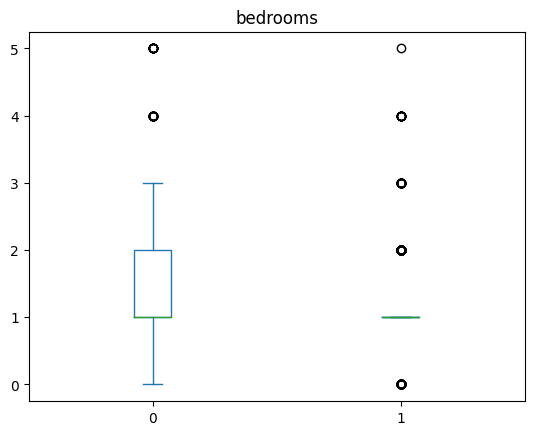

In [ ]:
df.plot.box(
    column = 'bedrooms',
    by = 'fraud'
);

price    Axes(0.125,0.11;0.775x0.77)
dtype: object

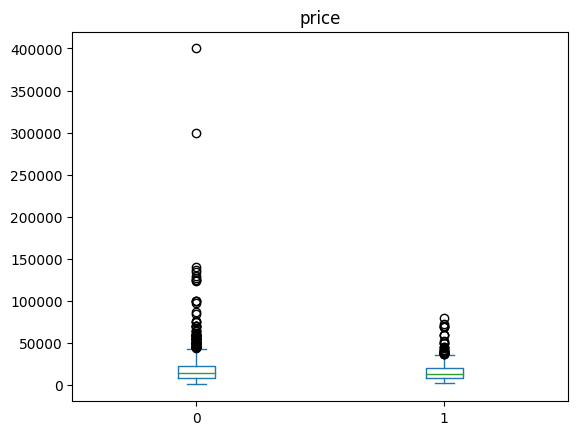

In [ ]:
df.plot.box(column='price',by='fraud')

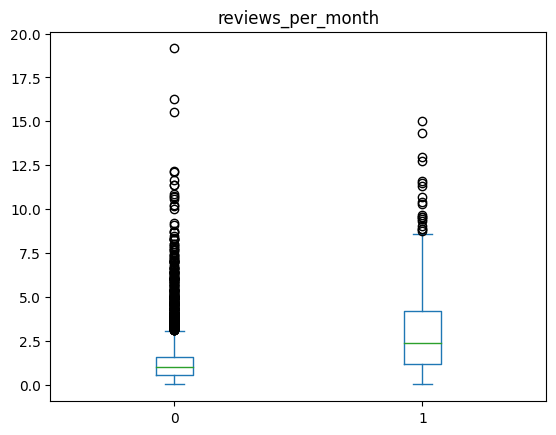

In [ ]:
df.plot.box(
    column = 'reviews_per_month',
    by = 'fraud'
);

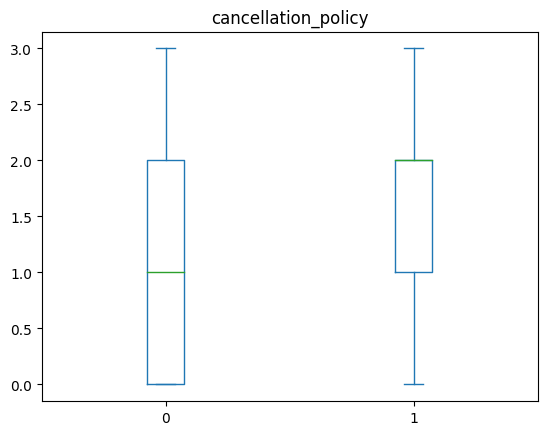

In [ ]:
df.plot.box(
    column = 'cancellation_policy',
    by = 'fraud'
);

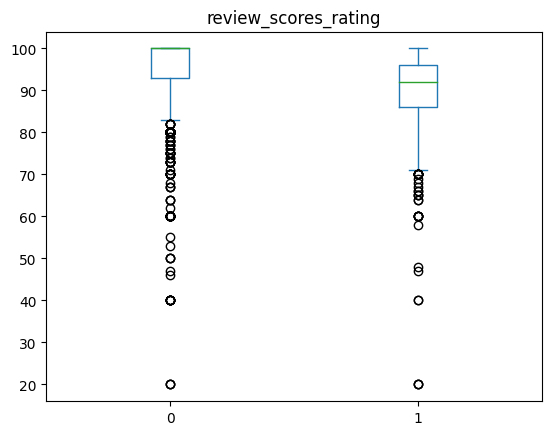

In [ ]:
df.plot.box(
    column = 'review_scores_rating',
    by = 'fraud'
);

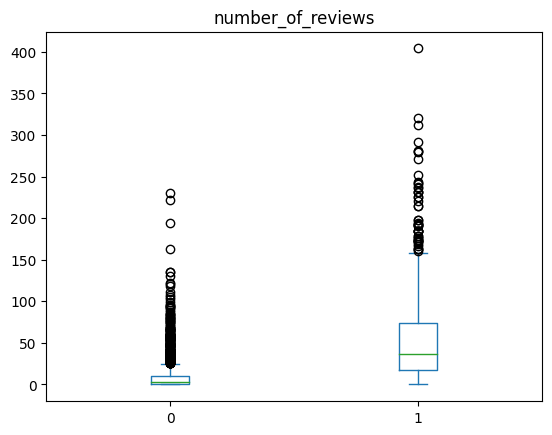

In [ ]:
df.plot.box(
    column = 'number_of_reviews',
    by = 'fraud'
);

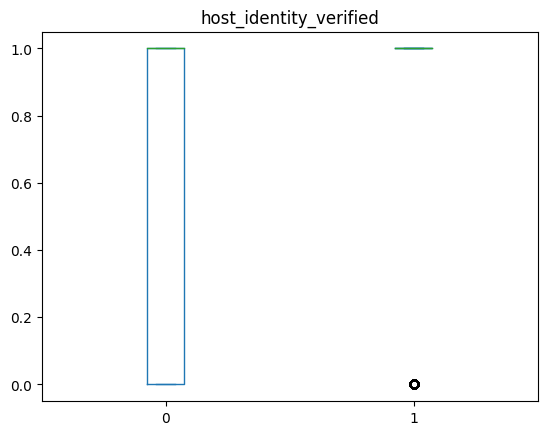

In [ ]:
df.plot.box(
    column = 'host_identity_verified',
    by = 'fraud'
);

## **Limpieza del DataSet**
Al momento de limpiar datos atípicos y NaNs, tomamos en consideración las variables principales, en este caso `fraud` y `price`, por lo cual borramos los dos datos atípicos más alejados que son visibles en el *boxplot* de `price`, y no realizamos limpieza por parte de fraud porque no encontramos datos atípicos para lo que vienen siendo Booleanos. Además nos aseguramos de ejecutar el comando `.dropna()` (que elimina las filas que contengan datos NaN) a pesar de que no presentamos errores al momento de graficar para que no nos dé problemas a futuro.



In [ ]:
clean_df = df[['fraud','price','review_scores_rating','number_of_reviews',
               'host_response_rate','host_identity_verified','amenities',
               'accommodates','minimum_nights']].loc[df['price']<=200000]
clean_df.dropna();

## **Presentación de la información del DataSet**

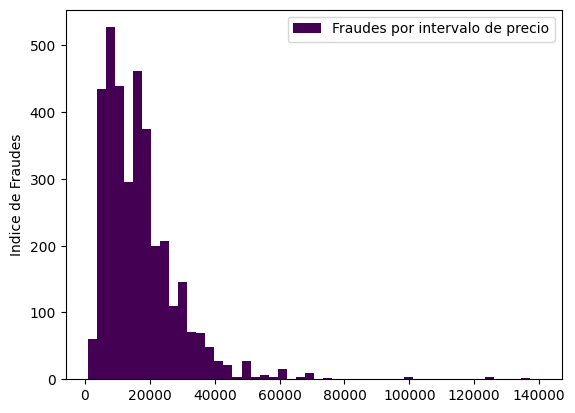

In [ ]:
clean_df.plot.hist(y='price', x='fraud', bins=50, ylabel='Indice de Fraudes',
             cmap='viridis', label='Fraudes por intervalo de precio');

*Este gráfico nos muestra el indice de fraudes respecto al precio.*

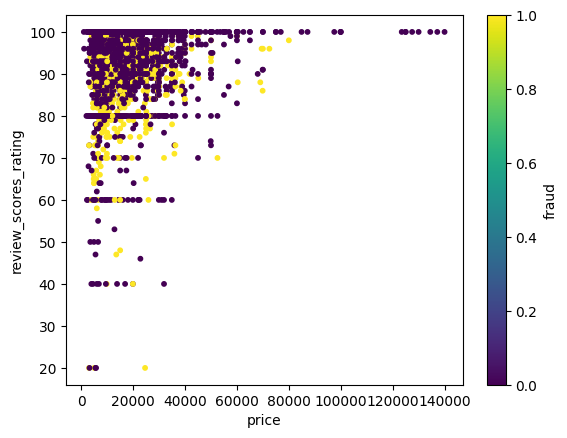

In [ ]:
clean_df.plot.scatter(x="price", y='review_scores_rating', c='fraud', cmap="viridis", s=10);

*Gráfico de dispersión de la variable 'review_scores_rating' vs 'price'*

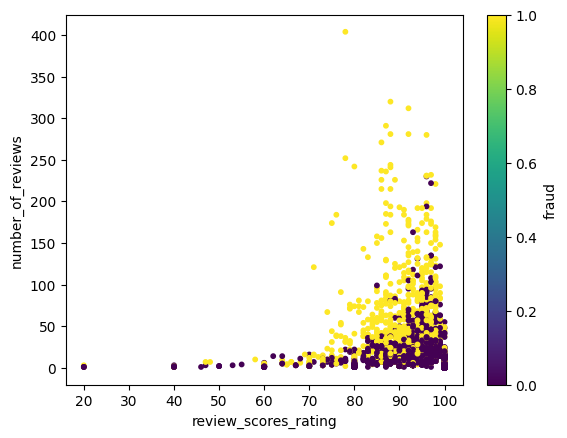

In [ ]:
clean_df.plot.scatter(x="review_scores_rating", y='number_of_reviews', c='fraud', cmap="viridis", s=10);

*Gráfico de dispersión de la variable 'number_of_reviews' vs 'review_scores_rating'*

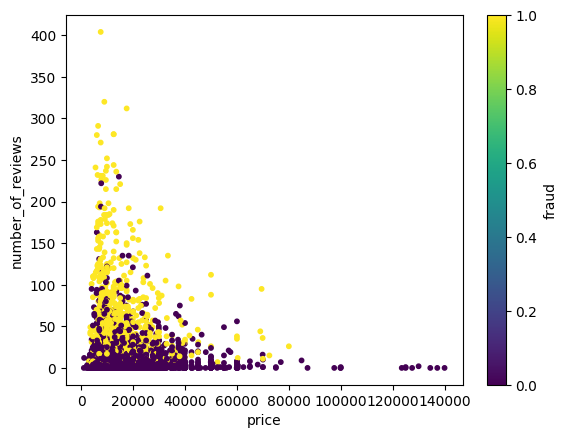

In [ ]:
clean_df.plot.scatter(x="price", y='number_of_reviews', c='fraud', cmap="viridis", s=10);

*Gráfico de dispersión de la variable 'number_of_reviews' vs 'price'*

<Axes: ylabel='¿Está Verificado?'>

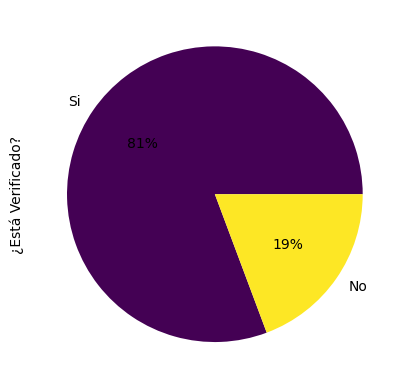

In [ ]:
fraud_df['host_identity_verified'].value_counts(dropna=True).plot(kind='pie',autopct='%1.0f%%',cmap='viridis',ylabel='¿Está Verificado?',labels=['Si','No'])

*Gráfico de torta de la variable 'host_identity_verified'*

<Axes: ylabel='¿Es Fraudulento?'>

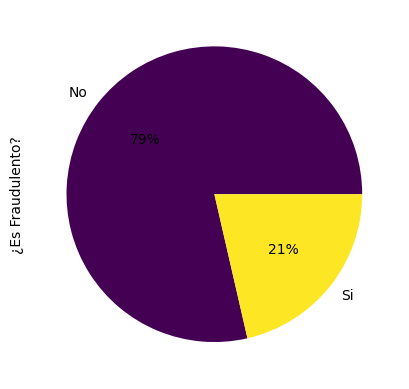

In [ ]:
clean_df['fraud'].value_counts(dropna=True).plot(kind='pie',autopct='%1.0f%%',cmap='viridis',ylabel='¿Es Fraudulento?',labels=['No','Si'])

*Gráfico de torta respecto a la variable 'fraud'*

<Axes: >

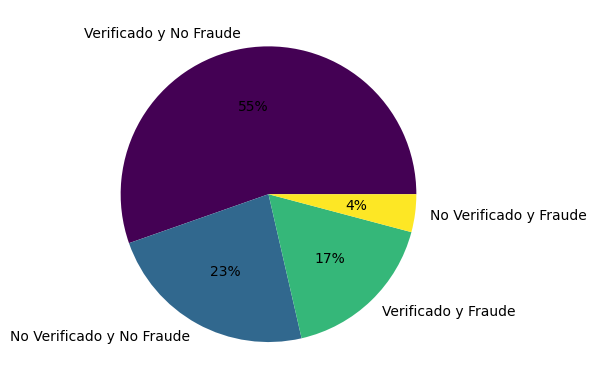

In [ ]:
labels = ['Verificado y No Fraude','No Verificado y No Fraude','Verificado y Fraude','No Verificado y Fraude']
clean_df[['host_identity_verified','fraud']].value_counts(dropna=True).plot(kind='pie',autopct='%1.0f%%',cmap='viridis', labels=labels, ylabel='')

*La unión entre los dos gráficos de torta anteriores, en donde se puede apreciar en cuatro secciones cuales son los verificados y fraudes.\*

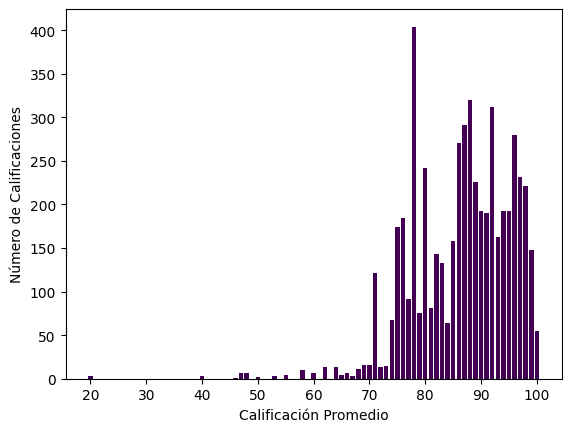

In [ ]:
plt.bar(clean_df['review_scores_rating'],clean_df['number_of_reviews'],color='#440154')
plt.xlabel('Calificación Promedio')
plt.ylabel('Número de Calificaciones')
plt.show();

*Gráfico de barras de la variable 'number_of_review' vs 'variable  review_scores_rating'*

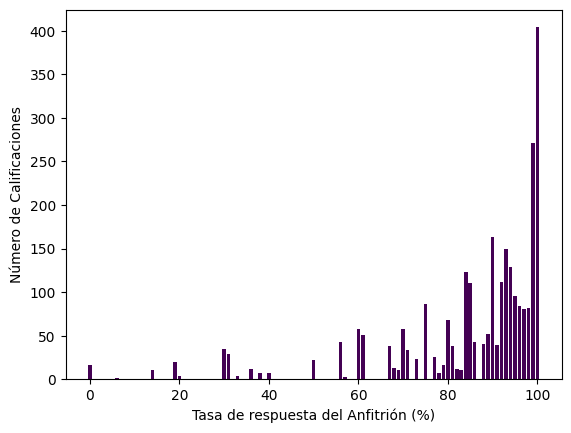

In [ ]:
plt.bar(clean_df['host_response_rate'],clean_df['number_of_reviews'],color='#440154')
plt.xlabel('Tasa de respuesta del Anfitrión (%)')
plt.ylabel('Número de Calificaciones')
plt.show();

*Gráfico de barras de la variable 'number_of_review' vs 'variable  host_response_rate'*

<Axes: >

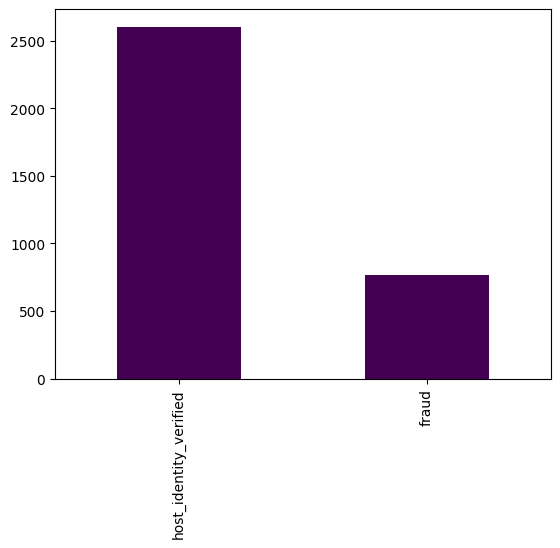

In [ ]:
clean_df[['host_identity_verified','fraud']].sum().plot(kind='bar',cmap='viridis')

*Histograma de variables 'host_identity_verified' y 'fraud'*

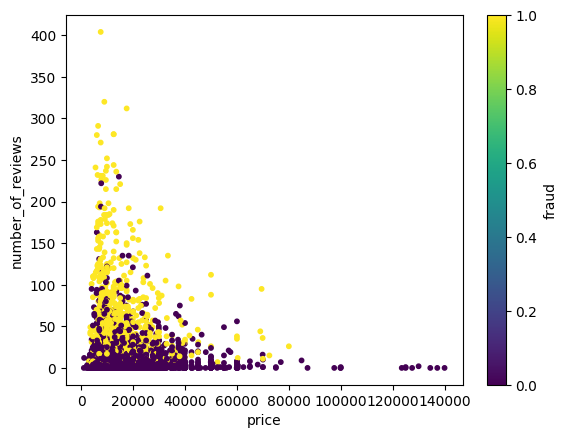

In [ ]:
clean_df.plot.scatter(x="price", y='number_of_reviews', c='fraud', cmap="viridis", s=10);

*Gráfico de dispersión de la variable 'number_of_reviews' vs 'price'*

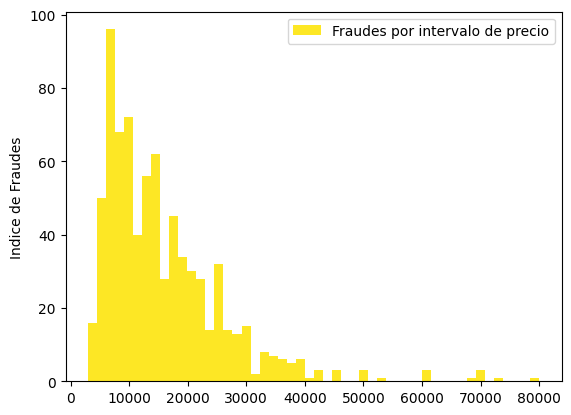

In [ ]:
fraud_clean_df = clean_df.loc[clean_df['fraud']==1]
fraud_clean_df.plot.hist(y='price', x='fraud', bins=50, ylabel='Indice de Fraudes',
             cmap='viridis_r', label='Fraudes por intervalo de precio');


El gráfico revela una distribución de precios en relación con los casos de fraude, evidenciando una concentración de valores en la parte más baja del espectro de precios. Esto indica una acumulación de alojamientos con tarifas más económicas en la plataforma. Sin embargo, es importante destacar que, a pesar de ser identificados como fraudes, los alojamientos fraudulentos muestran valores elevados en las reviews y una distribución equitativa en la cantidad de reviews, incluso más pronunciada que en los casos no fraudulentos.


Después de ver todos nuestros gráficos, podemos decir que si bien el precio por si solo es un buen indicador, la variación de estos no puede indicar si un hospedaje es fraude o no, ya que los estafadores pueden camuflarse entre precios lógicos o razonables para maximizar su número de estafas realizadas.

# **Entrega 2**

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
from scipy import stats
import sympy as sp
from sympy.stats import Gamma, density
from sympy import log, Sum

In [ ]:
df = pd.read_csv("/content/fraudeAirbnb.csv")

In [ ]:
clean_df = df[['fraud','price','review_scores_rating','number_of_reviews',
               'host_response_rate','host_identity_verified','amenities',
               'accommodates','minimum_nights']].loc[df['price']<=200000]
clean_df.dropna();

## Precio

In [ ]:
prices = clean_df['price'].loc[clean_df['price']<40000]
price_density = stats.gaussian_kde(prices, bw_method=0.3)
x = np.linspace(0,40000,100)

### Método de los Momentos

Para la distribución gamma $E(X) = \alpha \beta$ y $V(X) = \alpha \beta^2$, debemos obtener $E(X^2)$, gracias a la propiedad de la varianza podemos obtenerla:
$$
(V(X)+E(X)^2)
$$ \\
Sabemos que
$$
E(X) = (\frac{1}{n} * \Sigma_i(x_i^2)) = \overline{x}
$$
y
$$
E(X^2) = (\frac{1}{n} * \Sigma_i(x_i^2)) = \alpha^2\beta^2 + \beta^2 \alpha
$$
Dividiendo por $\alpha \beta$ y despejando $\beta$, tenemos:

In [ ]:
beta = ((((1/prices.count())) * np.square(prices).sum() - (prices.mean())**2)/prices.mean())

Despejando $\alpha$ con el $\hat{\beta}$ obtenido:

In [ ]:
alpha = prices.mean()/beta
print(alpha)
print(beta)

3.3323273516565206
4659.278856168038


En conclusión, el sistema de ecuaciones dado por el metodo de los momentos es el siguiente:
1. $\alpha \beta = \overline{x}$
2. $\alpha^2 \beta^2 + \beta^2 \alpha = \frac{1}{n}(\Sigma x_i^2)$

### Método de Máxima Verosimilitud

In [ ]:
a = sp.Symbol('alpha', positive = True)
b = sp.Symbol('beta', positive = True)
n = prices.count()
sum = prices.sum()
sumlog = np.log(prices).sum()
X = Gamma("x", a, b)
gamma_pdf = density(X)(sp.Symbol("x_i"))

Por lo que tenemos que la log-verosimilitud es:

In [ ]:
func = Sum(log(gamma_pdf), ('i',1,'n'))
func

Sum(log(x_i**(alpha - 1)*exp(-x_i/beta)/(beta**alpha*gamma(alpha))), (i, 1, n))

Desarrollando más la ecuación de log-verosimilitud obtenemos que:
$$
\hat{\beta} = \frac{\overline{x}}{\alpha}
$$

Después de realizar las derivadas parciales, tenemos el siguiente sistema de ecuaciones: \\
$$
\begin{cases}
\frac{-n \alpha}{\beta} + \frac{1}{\beta} \Sigma_i x_i = 0\\
-n \frac{\Gamma '(\alpha)}{\Gamma (\alpha)} - n \ln \beta + \Sigma_i \ln x_i = 0
\end{cases}
$$ \\
Donde $\Sigma_i x_i$ es la sumatoria de todos los precios y $\Sigma_i \ln x_i$ es la sumatoria de los precios logarítmicos. \\
La primera ecuación proviene de $\frac{\partial}{\partial \beta}$ y la segunda de $\frac{\partial}{\partial \alpha}$

In [ ]:
da = sp.Eq(-n*sp.diff(sp.factorial(a-1))/sp.factorial(a-1) - n*log(b) + sumlog, 0)
db = sp.Eq(-n*a/b + 1/b*sum, 0)

In [ ]:
da

Eq(-3441*log(beta) + 32646.8716609805 - 3441*gamma(alpha)*polygamma(0, alpha)/factorial(alpha - 1), 0)

In [ ]:
db

Eq(-3441*alpha/beta + 53425800/beta, 0)

Y por medio del análisis de la función digamma en el sistema de ecuaciones, podemos obtener el estimador $\hat{\alpha}$:

In [ ]:
a_hat = 0.5 / ( log(sum/n) - sumlog/n )
a_hat

3.07360764211795

Con eso podemos ya definir el valor de $\hat{\beta}$:

In [ ]:
b_hat = (sum/n)/a_hat
b_hat

5051.47181398369

### Funciones

Los valores de α y β obtenidos para "price" en una distribución Gamma fueron:

In [ ]:
a_mom = 3.3323273516565206
b_mom = 4659.278856168038
gamma_mom = gamma_pdf.subs(a, a_mom).subs(b, b_mom).simplify()

In [ ]:
a_ml = 3.07360764211795
b_ml = 5051.47181398369
gamma_ml = gamma_pdf.subs(a, a_ml).subs(b, b_ml).simplify()

In [ ]:
x = sp.Symbol('x')
gamma_ec = ((x**a * sp.exp(-(x)/b)) / (sp.gamma(a)* b**a))
gamma_ec

x**alpha*exp(-x/beta)/(beta**alpha*gamma(alpha))

Quedando las siguientes ecuaciones

In [ ]:
gammamom

2.15110386383194e-13*x_i**2.33232735165652*exp(-0.000214625488379212*x_i)

In [ ]:
gamma_ml

1.93266716766252e-12*x_i**2.07360764211795*exp(-0.000197962106258172*x_i)

### Gráfico
Con eso, podemos graficar las dos funciones anteriores en un mismo gráfico:

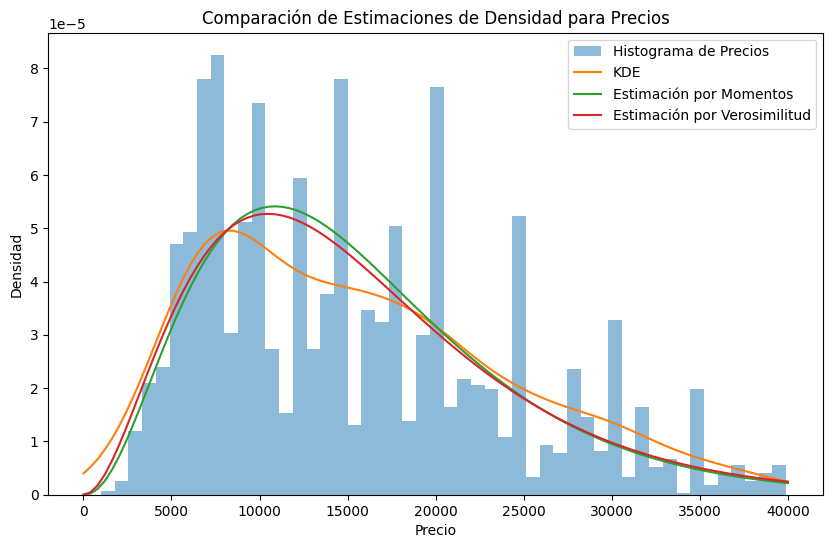

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(prices, bins=50, density=True, alpha=0.5, label='Histograma de Precios')
plt.plot(x, price_density(x), label='KDE')
plt.plot(x, stats.gamma.pdf(x,*(3.3323273516565206,0,4659.278856168038)), label = "Estimación por Momentos")
plt.plot(x, stats.gamma.pdf(x,*(3.07360764211795,0,5051.47181398369)), label = "Estimación por Verosimilitud")
plt.xlabel('Precio')
plt.ylabel('Densidad')
plt.title('Comparación de Estimaciones de Densidad para Precios')
plt.legend()
plt.show()

## Número de Reseñas

### Método de los Momentos

Ahora calcularemos el parametro 'theta' por el Metodo de los momentos.


In [ ]:
number_of_reviews = df['number_of_reviews']
theta = (number_of_reviews.sum()/len(number_of_reviews))  #UTILICÉ THETA = PROMEDIO Y NO THETA = 1/PROMEDIO COMO SALE EN TEMA 6 SLIDE 12
print(theta)

19.04463040446304


### Método de Máxima Verosimilitud

Obtenemos verosimilitud y log-verosimilitud: \\
$$
\displaylines{
L(\theta) = \Pi_{i=1}^n(\frac{1}{θ} e^{-x_i/θ}) \\
l(S; \theta) = \log L(\theta) = -n \ln(θ) - \Sigma_i \frac{x_i}{\theta}
}
$$ \\
Primera derivada parcial para demostrar maximo verosimil, buscaremos que la derivada sea igual a 0

In [ ]:
# Definir la variable simbólica
theta = sp.symbols('theta')
x = sp.symbols('x')

# Convertir la columna 'number_of_reviews' en un array de NumPy
number_of_reviews = np.array(df['number_of_reviews'])

# Definir la función de log-verosimilitud
funcion = -len(number_of_reviews) * sp.log(theta) - number_of_reviews.sum()/theta

# Calcular la derivada con respecto a theta
derivada = sp.diff(funcion, theta)

print(derivada)
ecuacionverosimil = sp.Eq(derivada,0)

-3585/theta + 68275/theta**2


In [ ]:
sp.solve(ecuacionverosimil)[0].simplify()

13655/717

Este resultado es igual al promedio, el cual se encuentra a continuación:

In [ ]:
theta_hat = 13655/717
prom = number_of_reviews.sum()/len(number_of_reviews)
print(f"{prom} == {theta_hat}")

19.04463040446304 == 19.04463040446304


Con eso evaluado, ahora hay que buscar que la segunda derivada sea menor a 0

In [ ]:
derivada2 = sp.diff(derivada, theta)
print("valor derivada:", derivada2)

derivada2_con_promedio = derivada2.subs({theta: prom})
print(derivada2_con_promedio)

valor derivada: 3585/theta**2 - 136550/theta**3
-9.88425776118909


Como la 2da derivada parcial es negativa, significa que es un máximo global

### Gráfico

In [ ]:
reviews_density = stats.gaussian_kde(number_of_reviews)
theta_mom = 19.04463040446304
theta_ml = 13655/717

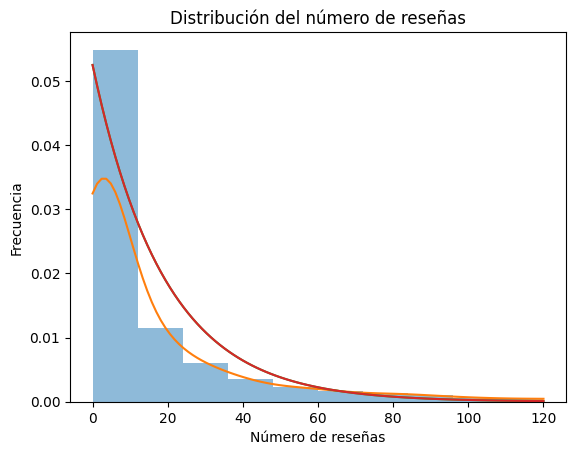

In [ ]:
# Calculate the rate parameter (lambda) of the exponential distribution
lambda_ = 1. / df['number_of_reviews'].mean()

# Generar el eje X
x = np.linspace(0, 120, 100)

# Generar valores Y correspondientes a la distribución exponencial
y = stats.expon.pdf(x, scale=1/lambda_)

# Crear histograma del número de reseñar, se limita el rango a 120 reseñas
plt.hist(df['number_of_reviews'], range=(0, 120), density=True, alpha=0.5)

# Graficar las funciones
plt.plot(x, reviews_density(x), label="Densidad de Kernel")
plt.plot(x, stats.expon.pdf(x, 0, theta_mom), label="Estimación de Momentos")
plt.plot(x, stats.expon.pdf(x, 0, theta_ml), label="Estimación de Verosimilitud")

# Add title and labels
plt.title('Distribución del número de reseñas')
plt.xlabel('Número de reseñas')
plt.ylabel('Frecuencia')

# Show the plot
plt.show()


**Preguntas**

¿Que suposiciones haces al usar cada método de estimación? \\
Para ambas estimaciones supusimos que las variables aleatorias de interés siguen un modelo de probabilidad definido que dependía de los parámetros a estimar. \\
Además de eso, para el método de los momentos, se supuso que el primer momento, el cual es el "más importante", es igual a la media muestral. \\
Para el método de máxima verosimilitud, se asumió que la función de densidad de probabilidad es derivable varias veces, dado que es necesario poder derivar para poder usar este método.

¿Cúales son las limitaciones de los metodos de maxima verosimilitud y de los
momentos en la practica? \\
Las limitiaciones de los metodos usados son varios, pero los mas destacables y notables.

Maxima Verosimilitud:
- La necesidad de una gran cantidad de datos, debido a que a menor datos, menos preciso
es el estimador.
- Los outliers. La existencia de estos valores alteran este valor, generando un sesgo en el
dato.
- la posible existencia de varios maximos locales, lo que entorpece el calculo del maximo global
para el calculo de la maxima verosimilitud

Estimador de los momentos:
- Al elegir los momentos, se puede tener problemas al saber cual elegir o plantear mal
el momento elegido.
- Son sensibles a la muestra, lo que puede generar que muestras con datos poco representativos
puedan generar datos poco confiables
- Menor eficiencia que otros metodos de estimadores.


¿Como podrıas aplicar el modelo ajustado para hacer predicciones o inferencias sobre una nueva muestra de datos? \\
En primer lugar, para poder aplicar el modelo ajustado, dependerá principalmente de la calidad del ajuste realizado como de las características asociadas a la nueva muestra de datos, puede ocurrir que no siga la misma distribución (con ello, los parámetros) estimada con anterioridad. Si el modelo no requiere ser actualizado podemos utilizar el parámetro (por ejemplo, para la distribución exponencial) theta para calcular fácilmente probabilidades dentro de un rango especifico con la función de distribución acumulada o la función de densidad de probabilidad. Esto nos permite hacer inferencias sobre la probabilidad de ocurrencia de eventos en la nueva muestra.
Un ejemplo de predicción seria generar nuevos valores para la variable `number_of_reviews`, que sigan con la distribución elegida (en este caso, exponencial).

¿Que implicaciones tienen los parametros estimados en el contexto del problema
real que modela el dataset? \\
En la distribución gamma (precio), nos encontramos con que alpha es un valor más bajo que beta, esto implica que el grafico tiene una forma asimétrica, sus valores no son tan dispersos, y los valores extremos tienen baja probabilidad. En la distribución exponencial (numero de reviews) tenemos un theta relativamente bajo, por lo que la tasa de ocurrencia de eventos es relativamente baja. Esto significa que los eventos ocurren con menor frecuencia en un período de tiempo dado.

¿De qué forma se puede validar los resultados que no sea de forma gráfica? \\
Existen formas de validar datos sin la necesidad de usar una forma grafica
- Forma teorica: Si se tiene comprension de la funcion de probabilidad de una estadistica, o de una
que pueda asemejarse al valor deseado, permitiria hacer comparaciones que ayudan a inferir una correcta
distribucion
- Forma Experimental: Seria comprobar los datos con datos experimentales comprobados, que permitan comparar nuestros datos
a una distribucion real, con esto, podemos saber si es que los datos son probablemente correctos o validos.
- Los intervalos de confianza pueden ayudar a saber que valores pueden ser mas validos, ya que limita nuestra incertidumbre frente a posibles datos

# **Bonus**

Una nave espacial debe viajar periódicamente desde la Vía Láctea hasta la galaxia M33. Durante su viaje, la astronave encuentra X planetas con características similares a la Tierra. La probabilidad de que cualquiera de estos X planetas sea habitable por humanos es p = 0.2 independientemente de los demás. Si denotamos Y a la cantidad de planetas habitables encontrados y X sigue la siguiente f.d.p.

\
\begin{vmatrix}
x & 0 & 1 & 2 & 3\\
f(x) & 0.1 & 0.2 & 0.3 & 0.4
\end{vmatrix}

>Ejecutar antes de cualquier cosa

In [ ]:
#[Imports]: Importa las bibliotecas necesarias
import matplotlib.pyplot as plt
from scipy import stats
import random
import pandas as pd
from math import comb, factorial
from IPython.display import display_html, display, HTML

In [ ]:
# Define una función que simula lanzamientos de dados y cuenta cuántos salen con valor 1
def isHab(max):
  salida=0
  for a in range(max):
    prob=random.randint(1,10)
    if prob<=2:
      salida+=1
  return salida

# Define la función de distribución binomial
def bino(n, k, p):
  return comb(factorial(n), factorial(k))*(p**(n))*(1-p)**(k-n)

# Calcula el valor esperado de una función de distribución
def ValorEsperado(FuncY):
  salida=0;
  FuncY_Keys=list(FuncY.keys())
  for a in FuncY[FuncY_Keys[0]]:
    salida+=a*FuncY[FuncY_Keys[1]][a]
  return round(salida,4)

# Calcula la función condicional de x dado y
def cond_x(f_cond, data, func_Y):
  for x in range(4):
      f_cond["fx|y=1(x)"][x] += data[x][1] / func_Y['f(y)'][1]

a) Determine teórica y experimentalmente la f.d.p. conjunta de X e Y .

In [ ]:
# Genera datos experimentales simulados
data=[[],[],[],[]]
data_exp=[[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]]

for a in range(100000):
  prob=random.randint(1,10)
  if prob<=1:
    data[0].append(isHab(0))
  elif prob<=3:
    data.append(1)
    data[1].append(isHab(1))
  elif prob<=7:
    data.append(2)
    data[2].append(isHab(2))
  else:
    data.append(3)
    data[3].append(isHab(3))

# Calcula la frecuencia relativa de los valores obtenidos
for a in range(4):
  for b in range(4):
    avg=data[a].count(b)*((a+1)/10)/len(data[a])
    data_exp[a][b]=avg

# Calcula las probabilidades teóricas usando la distribución binomial
x0 = stats.binom.pmf([0], 0, 0.2) * 0.1
x1 = stats.binom.pmf([0, 1], 1, 0.2) * 0.2
x2 = stats.binom.pmf([0, 1, 2], 2, 0.2) * 0.3
x3 = stats.binom.pmf([0, 1, 2, 3], 3, 0.2) * 0.4


data_teo = [[x0[0], 0, 0, 0], [x1[0], x1[1], 0, 0], [x2[0], x2[1], x2[2], 0], [x3[0], x3[1], x3[2], x3[3]]]


# Crea DataFrames para los datos experimentales y teóricos
data_exp_tabla = {"X\Y":[0,1,2,3,],
                  "0":data_exp[0],
                  "1":data_exp[1],
                  "2":data_exp[2],
                  "3":data_exp[3]}

data_teo_tabla = {"X\Y":[0,1,2,3,],
                  "0":[x0[0], 0, 0, 0],
                  "1":[x1[0], x1[1], 0, 0],
                  "2":[x2[0], x2[1], x2[2], 0],
                  "3":[x3[0], x3[1], x3[2], x3[3]]}

# Convierte los datos a DataFrames de Pandas y formatea la visualización
df_exp=pd.DataFrame(data_exp_tabla)
df_exp.set_index('X\Y', inplace=True)
df_exp=df_exp.transpose()
df_exp=df_exp.style.format(precision=4, thousands=".", decimal=",")

df_teo = pd.DataFrame(data_teo_tabla)
df_teo.set_index('X\Y', inplace=True)
df_teo=df_teo.transpose()

# Muestra los resultados experimentales y teóricos
display(HTML('<h2>Funcion conjunta Experimental</h2>'))
display(df_exp)
display(HTML('<h2>Funcion conjunta Teorica</h2>'))
display(df_teo)


X\Y,0,1,2,3
0,"0,1000","0,0000","0,0000","0,0000"
1,"0,1586","0,0414","0,0000","0,0000"
2,"0,1923","0,0958","0,0118","0,0000"
3,"0,2052","0,1533","0,0385","0,0030"


X\Y,0,1,2,3
0,0.1000,0.0000,0.0000,0.0000
1,0.1600,0.0400,0.0000,0.0000
2,0.1920,0.0960,0.0120,0.0000
3,0.2048,0.1536,0.0384,0.0032


b) Determine teórica y experimentalmente la f.d.p. marginal de Y y su valor esperado.

In [ ]:
  # Define diccionarios para almacenar las frecuencias de Y
teoY={"y": [0,1,2,3],
      "f(y)": []}
expY={"y": [0,1,2,3],
      "f(y)": []}

# Calcula las frecuencias de Y sumando las probabilidades de cada valor de X
for a in range(4):
    teoY["f(y)"].append(data_teo[0][a]+data_teo[1][a]+data_teo[2][a]+data_teo[3][a])
    expY["f(y)"].append(data_exp[0][a]+data_exp[1][a]+data_exp[2][a]+data_exp[3][a])

# Convierte los diccionarios en DataFrames de Pandas para visualización
df_teo = pd.DataFrame(teoY)
df_teo.set_index('y', inplace=True)
df_teo=df_teo.transpose()
df_teo=df_teo.style.format(precision=4, thousands=".", decimal=",")

df_exp = pd.DataFrame(expY)
df_exp.set_index('y', inplace=True)
df_exp=df_exp.transpose()
df_exp=df_exp.style.format(precision=4, thousands=".", decimal=",")

# Crea representaciones HTML para mostrar el valor esperado de Y y las funciones Y (experimental y teórico)
esperado_exp_y='<p></font>E(y) = '+(str)(ValorEsperado(expY))+'</p>'
esperado_teo_y='<p></font>E(y) = '+(str)(ValorEsperado(teoY))+'</p>'
display(HTML('<h2>Funcion Y Experimental</h2>'))
display(HTML(esperado_exp_y))
display(df_exp)
display(HTML('<h2>Funcion Y Teorica</h2>'))
display(HTML(esperado_teo_y))
display(df_teo)

y,0,1,2,3
f(y),"0,6561","0,2906","0,0503","0,0030"


y,0,1,2,3
f(y),"0,6568","0,2896","0,0504","0,0032"


c) Determine teórica y experimentalmente la f.d.p. condicional de X al valor Y = 1. Determine además E(X|Y = 1).

In [ ]:
# Calcula y muestra la función condicional para X dado Y (experimental y teórico)
f_cond_exp_x={"X":[0,1,2,3],
              "fx|y=1(x)":[0,0,0,0]}
f_cond_teo_x={"X":[0,1,2,3],
              "fx|y=1(x)":[0,0,0,0]}

# Calcula la función condicional para X dado Y en los datos experimentales y teóricos
cond_x(f_cond_exp_x, data_exp, expY)
cond_x(f_cond_teo_x, data_teo, teoY)

# Crea DataFrames para las funciones condicionales de X dado Y (experimental y teórico)
df_teo = pd.DataFrame(f_cond_teo_x)
df_teo.set_index('X', inplace=True)
df_teo=df_teo.transpose()

df_exp = pd.DataFrame(f_cond_exp_x)
df_exp.set_index('X', inplace=True)
df_exp=df_exp.transpose()

# Muestra los resultados de las funciones condicionales de X dado Y (experimental y teórico)
display(HTML("<h2>Funcion Condicional X Experimental</h2>"))
print("E(x) =",ValorEsperado(f_cond_exp_x))
display(df_exp)
display(HTML('<br><h2>Funcion Condicional X Teorica</h2>'))
print("E(x) =",ValorEsperado(f_cond_teo_x))
display(df_teo)


E(x) = 2.3852


X,0,1,2,3
fx|y=1(x),0.0,0.142526,0.329798,0.527676


E(x) = 2.3923


X,0,1,2,3
fx|y=1(x),0.0,0.138122,0.331492,0.530387


# **Entrega 3**

## Importación de bibliotecas

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from math import sqrt

In [ ]:
from scipy import stats
from scipy.stats import t
import sympy as sp
from sympy.stats import Gamma, density
from sympy import log, Sum

In [ ]:
df = pd.read_csv("/content/fraudeAirbnb.csv")

In [ ]:
clean_df = df[['fraud','price','review_scores_rating','number_of_reviews',
               'host_response_rate','host_identity_verified','amenities',
               'accommodates','minimum_nights']].loc[df['price']<=200000]
clean_df.dropna();

In [ ]:
prices = clean_df['price'].loc[clean_df['price']<40000]
number_of_reviews = df['number_of_reviews']
price_density = stats.gaussian_kde(prices, bw_method=0.3)
x = np.linspace(0,40000,100)

## Esperanza y Varianza

Utilizando los parámetros puntuales de los métodos de máxima verosimilitud y método de los momentos (para ambas variables), calcular la esperanza E[x] y varianza Var(X). Luego, construya intervalos de confianza y concluya respecto del resultado. Para lo anterior debe trabajar con un nivel de significancia de 0.05 y explicitar:
- ¿Qué suposiciones se deben cumplir para llevar a cabo el procedimiento?
- ¿Frente a qué Caso se encuentra? (IC para varianza conocida, IC para varianza desconocida, comparación de proporciones, etc.)
- ¿Qué estadístico utilizó en cada caso?
- ¿Cuál es el IC obtenido y qué concluye sobre lo obtenido?
- ¿Cuál es el IC más pequeño que puede construir para que la E[X] (O en su defecto la Var(X)) de la distribución escogida pertenezca al intervalo?

Recuerde que debe hacer 4 procedimientos de IC, 2 por cada variable obtenida y uno para cada estimación con parámetros (MMV y MM). En caso de tener resultados exactamente iguales para ambos métodos se puede proceder a realizar sólo un procedimiento para esa variable.

###Calculo Intervalos de Confianza

###### α , β y θ obtenidos de la entrega 2

In [ ]:
a = sp.Symbol('alpha', positive = True)
b = sp.Symbol('beta', positive = True)
th = sp.Symbol('theta', positive = True)

In [ ]:
a_mom = 3.3323273516565206
b_mom = 4659.278856168038

In [ ]:
a_ml = 3.07360764211795
b_ml = 5051.47181398369

In [ ]:
theta_mom = 19.04463040446304
theta_ml = 13655/717

###### Esperanza y Varianza

In [ ]:
esperanza_g = a*b

In [ ]:
varianza_g = a*b**2

In [ ]:
esperanza_e = th

In [ ]:
varianza_e = th**2

###### IC

Como la varianza calculada es una varianza muestral y no poblacional, calcularemos los IC para varianza desconocida.

$$
T = \frac{\overline X-\mu }{\delta/\sqrt{n} } \ \thicksim \ T_{\ \ n-1}
$$

Nos queda la siguiente inecuacion para calcular los intervalos:
$$
-t_{\alpha/2\ ,\ n-1}\ \leq \ \frac{\overline X-\mu }{\delta/\sqrt{n} }\ \leq \ t_{\alpha/2\ ,\ n-1}
$$

Si espejamos μ, obtenemos la formula para IC con varianza desconocida que encontramos en los formularios del curso:

$$
-t_{\alpha/2\ ,\ n-1}\ \ \frac{\delta}{\sqrt{n}}\ \leq \ \overline X-\mu \ \leq \ t_{\alpha/2\ ,\ n-1}\ \ \frac{\delta}{\sqrt{n}}
\\
-t_{\alpha/2\ ,\ n-1}\ \frac{\delta}{\sqrt{n}}-\overline X \ \leq -\mu \leq \ t_{\alpha /2\ ,\ n-1}\ \frac{\delta}{\sqrt{n}} - \overline X
\\
\overline X -t_{\alpha/2\ ,\ n-1}\ \frac{\delta}{\sqrt{n}}\leq \mu \leq \overline X+ t_{\alpha /2\ ,\ n-1}\ \frac{\delta}{\sqrt{n}}
$$

Reemplazando los valores pertinentes obtenemos que los Intervalos de Confianza

In [ ]:
promedio_p = prices.mean()
promedio_n = number_of_reviews.mean()
print("El promedio de precio es",promedio_p)
print("El promedio de number_of_reviews es",promedio_n)

El promedio de precio es 15526.242371403661
El promedio de number_of_reviews es 19.04463040446304


In [ ]:
from scipy.stats import t

n_p = prices.count()
n_n = number_of_reviews.count()
alpha = 0.05
t_g = t.ppf(alpha/2 , df=n_p-1)
t_e = t.ppf(alpha/2 , df=n_n-1)
print("t para precio:",abs(t_g))
print("t para number_of_reviews:",abs(t_e))

t para precio: 1.9606538368482238
t para number_of_reviews: 1.9606261103650608


#### Precio

#####Método de los momentos

In [ ]:
e_momG = esperanza_g.subs(a, a_mom).subs(b, b_mom).simplify()
print("Esperanza =",e_momG)

Esperanza = 15526.2423714037


In [ ]:
v_momG = varianza_g.subs(a, a_mom).subs(b, b_mom).simplify()
print("Varianza = ",v_momG)

Varianza =  72341092.7968214


In [ ]:
inf_momG = promedio_p - abs(t_g)*(v_momG / np.sqrt(n_p))
sup_momG = promedio_p + abs(t_g)*(v_momG / np.sqrt(n_p))
print("El IC al 95%, con el metodo del momento lineal es: ")
print(" IC = [",inf_momG,",",sup_momG,"]")

El IC al 95%, con el metodo del momento lineal es: 
 IC = [ -2402403.35993418 , 2433455.84467698 ]


#####Método de maximoverosimilitud

In [ ]:
e_mlG = esperanza_g.subs(a, a_ml).subs(b, b_ml).simplify()
print("Esperanza =",e_mlG)

Esperanza = 15526.2423714037


In [ ]:
v_mlG = varianza_g.subs(a, a_ml).subs(b, b_ml).simplify()
print("Varianza =",v_mlG)

Varianza = 78430375.7162250


In [ ]:
inf_mlG = promedio_p - abs(t_g)*(v_mlG / np.sqrt(n_p))
sup_mlG = promedio_p + abs(t_g)*(v_mlG / np.sqrt(n_p))
print("El IC al 95%, con el metodo del momento lineal es: ")
print(" IC = [",inf_mlG,",",sup_mlG,"]")

El IC al 95%, con el metodo del momento lineal es: 
 IC = [ -2605931.62939221 , 2636984.11413501 ]


#### Numero de reseñas

#####Método de los momentos

In [ ]:
e_momE = esperanza_e.subs(th, theta_mom).simplify()
print("Esperanza =",e_momE)

Esperanza = 19.0446304044630


In [ ]:
v_momE = varianza_e.subs(th, theta_mom).simplify()
print("Varianza = ",v_momE)

Varianza =  362.697947242598


In [ ]:
inf_momE = promedio_n - abs(t_e)*(v_momE / np.sqrt(n_n))
sup_momE = promedio_n + abs(t_e)*(v_momE / np.sqrt(n_n))
print("El IC al 95%, con el metodo del momento lineal es: ")
print(" IC = [",inf_momE,",",sup_momE,"]")

El IC al 95%, con el metodo del momento lineal es: 
 IC = [ 7.16794372031444 , 30.9213170886116 ]


#####Método de maximoverosimilitud

In [ ]:
e_mlE = esperanza_e.subs(th, theta_ml).simplify()
print("Esperanza =",e_mlE)

Esperanza = 19.0446304044630


In [ ]:
v_mlE = varianza_e.subs(th, theta_ml).simplify()
print("Varianza =",v_mlE)

Varianza = 362.697947242598


In [ ]:
inf_mlE = promedio_n - abs(t_e)*(v_mlE / np.sqrt(n_n))
sup_mlE = promedio_n + abs(t_e)*(v_mlE / np.sqrt(n_n))
print("El IC al 95%, con el metodo del momento lineal es: ")
print(" IC = [",inf_mlE,",",sup_mlE,"]")

El IC al 95%, con el metodo del momento lineal es: 
 IC = [ 7.16794372031444 , 30.9213170886116 ]


###Preguntas

¿Qué suposiciones se deben cumplir para llevar a cabo el procedimiento?

    Que las muestras sean independientes e identicamente distribuidas

¿Frente a qué Caso se encuentra? (IC para varianza conocida, IC para varianza desconocida, comparación de proporciones, etc.)

    En este caso, como la varianza calcula es muestral y no poblacional, nos encontramos con un caso con la varianza desconocida



¿Qué estadístico utilizó en cada caso?

    Para ambas variables usamos los mismos estadísticos

  $$
  T = \frac{\overline X-\mu }{\delta/\sqrt{n} } \ \thicksim \ T_{\ n-1}
  $$

¿Cuál es el IC obtenido y qué concluye sobre lo obtenido?

    Los Intervalos de Confianza obtenidos, al 95% (α = 0.05) son:

    Para Precio:
    - IC_momentos = [ -2402403.35993418 , 2433455.84467698 ]
    - IC_maximoverosimilitud = [ -2605931.62939221 , 2636984.11413501 ]

    Para Número de reseñas:
    - IC_momentos = [ 7.16794372031444 , 30.9213170886116 ]
    - IC_maximoverosimilitud = [ 7.16794372031444 , 30.9213170886116 ]

    Para el Precio, considerando que tiene una Esperanza = 15526.2423714037,
    tanto el IC del metodo de los momentos, como el IC del de maximoverosimilitud
    contienen la Esperanza, aunque el intervalo es muy grande.

    Para el Número de reseñas, ambos metodos obtuvieron los mismos IC,
    y la Esperanza = 19.0446304044630, se encuentra entre los IC obtenidos.

¿Cuál es el IC más pequeño que puede construir para que la E[X] (O en su defecto la Var(X)) de la distribución escogida pertenezca al intervalo?

    Si el nivel de confianza es de 0.0000000001%, y por tanto un nivel de significancia
    de α = 0.999999999999:

    Para Precio con una Esperanza = 15526.2423714037:

    - IC_momentos = [ 15526.2423698579 , 15526.2423729494 ]
    - IC_maximoverosimilitud = [ 15526.2256129686 , 15526.2591298388 ]

    Para Número de reseñas Esperanza = 19.0446304044630:

    - IC_momentos = [ 19.0446304044554 , 19.0446304044706 ]
    - IC_maximoverosimilitud = [ 19.0446304044554 , 19.0446304044706 ]

    Mientras más disminuya el nivel de confianza o aunmente el nivel designificancia
    (que seria lo mismo), el IC será más certero y acotado. Pero llegando a cierto
    punto la diferencia es casi infima.


###### IC con 0.0000000001%

In [ ]:
from scipy.stats import t

nc = 0.0000000001/100
n_p = prices.count()
n_n = number_of_reviews.count()
alpha = 0.999999999999    # 1-nc
t_g = t.ppf(alpha/2 , df=n_p-1)
t_e = t.ppf(alpha/2 , df=n_n-1)
print("t para precio:",abs(t_g))
print("t para number_of_reviews:",abs(t_e))

t para precio: 1.2533998460024227e-12
t para number_of_reviews: 1.2533961861060283e-12


    Esperanza precio = 15526.2423714037

In [ ]:
inf_momG = promedio_p - abs(t_g)*(v_momG / np.sqrt(n_p))
sup_momG = promedio_p + abs(t_g)*(v_momG / np.sqrt(n_p))
print("El IC al 0.0000000001% , con el mv para precios es: ")
print(" IC = [",inf_momG,",",sup_momG,"]")

El IC al 0.0000000001% , con el mv para precios es: 
 IC = [ 15526.2423698579 , 15526.2423729494 ]


In [ ]:
inf_mlG = promedio_p - abs(t_g)*(v_mlG / np.sqrt(n_p))
sup_mlG = promedio_p + abs(t_g)*(v_mlG / np.sqrt(n_p))
print("El IC al 0.0000000001% , con el mm para precios es: ")
print(" IC = [",inf_mlG,",",sup_mlG,"]")

El IC al 0.0000000001% , con el mm para precios es: 
 IC = [ 15526.2423697278 , 15526.2423730795 ]


    Esperanza number_of_reviews = 19.0446304044630

In [ ]:
inf_momE = promedio_n - abs(t_e)*(v_momE / np.sqrt(n_n))
sup_momE = promedio_n + abs(t_e)*(v_momE / np.sqrt(n_n))
print("El IC al 0.0000000001% , con el mm para number_of_reviews es: ")
print(" IC = [",inf_momE,",",sup_momE,"]")

El IC al 0.0000000001% , con el mm para number_of_reviews es: 
 IC = [ 19.0446304044554 , 19.0446304044706 ]


In [ ]:
inf_mlE = promedio_n - abs(t_e)*(v_mlE / np.sqrt(n_n))
sup_mlE = promedio_n + abs(t_e)*(v_mlE / np.sqrt(n_n))
print("El IC al 0.0000000001% , con el mv para number_of_reviews es: ")
print(" IC = [",inf_mlE,",",sup_mlE,"]")

El IC al 0.0000000001% , con el mv para number_of_reviews es: 
 IC = [ 19.0446304044554 , 19.0446304044706 ]


## Bondad de Ajuste

(Investigue) Realice una prueba de bondad de ajuste para las 2 variables con sus distribuciones escogidas. Además, incluya:
- ¿Qué prueba de bondad de ajuste utilizaron y por qué?
- ¿Con qué nivel de significancia trabajaron? ¿Qué pasa si se trabaja con uno mayor/menor?
- Concluya sobre sus resultados también tomando en cuenta los resultados de los
intervalos de confianza. ¿Fue una buena aproximación asumir que la distribución escogida explica los datos obtenidos? En caso de que la respuesta sea negativa, indique cuál distribución pasa el test escogido.

*Hint: Investigue sobre las pruebas de Kolmogorov-smirnov, Anderson-Darling,
chi-cuadrado, etc.* \\
https://es.wikipedia.org/wiki/Bondad_de_ajuste \\
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html \\
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html

###Respuestas

#### 1.-Se empleó la prueba de Kolmogorov-Smirnov para verificar si los datos observados se ajustan a una distribución gamma específica. Esta prueba es adecuada para determinar si una muestra proviene de una distribución particular, como en este caso, la distribución gamma.
#### 2.-El nivel de significancia no se especifica directamente en el contexto dado. Normalmente, en el análisis estadístico, se utiliza un nivel de significancia común como 0.05 o 0.01. Un nivel de significancia más alto implica ser menos estricto al momento de rechazar la hipótesis nula, mientras que un nivel menor implica ser más estricto en este proceso.
#### 3.- El estadístico KS de 0.2351 indica una buena concordancia entre los datos observados y la distribución gamma ajustada. Además, el valor extremadamente pequeño del valor p (8.606e-168) proporciona evidencia significativa para rechazar la hipótesis nula de que los datos no siguen una distribución gamma. En conjunto, estos resultados sugieren que la distribución gamma podría ser una buena aproximación para explicar los datos observados.

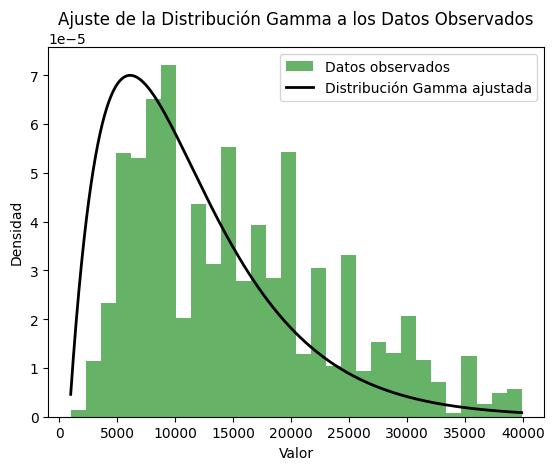


**KS Test Result:**

- Statistic: 0.23511309376872358
- P-value: 8.60633211083248e-168


In [ ]:
from IPython.display import Markdown, display
shape, loc, scale = 2, 870, 5256

samples = stats.gamma.rvs(shape, loc=loc, scale=scale, size=10000)

prueba = stats.kstest(prices, "gamma", (shape, loc, scale))

plt.hist(prices, bins=30, density=True, alpha=0.6, color='g', label='Datos observados')

x = np.linspace(min(prices), max(prices), 1000)
pdf = stats.gamma.pdf(x, shape, loc=loc, scale=scale)
plt.plot(x, pdf, 'k-', lw=2, label='Distribución Gamma ajustada')

plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.title('Ajuste de la Distribución Gamma a los Datos Observados')
plt.legend()
plt.show()
ks_result_md = f"""
**KS Test Result:**

- Statistic: {prueba.statistic}
- P-value: {prueba.pvalue}
"""

display(Markdown(ks_result_md))

### Respuestas
####1.-Se utilizó la prueba de Kolmogorov-Smirnov, al igual que en el caso anterior. Esta prueba es apropiada para verificar si los datos observados siguen una distribución específica, en este caso, la distribución exponencial.
####2.-Al igual que la anterior, se usa una significancia del 0.05 y un nivel de significancia mayor sería menos estricto para rechazar la hipótesis nula
####3.-El estadístico KS de 0.2896 indica cierta discrepancia entre los datos observados y la distribución exponencial ajustada. Además, el valor extremadamente pequeño del valor p (7.841e-267) proporciona una fuerte evidencia para rechazar la hipótesis nula de que los datos no siguen una distribución exponencial. Esto sugiere que la distribución exponencial podría no ser una buena aproximación para explicar los datos observados. La discrepancia observada entre los datos y la distribución ajustada indica que otra distribución podría ajustarse mejor.

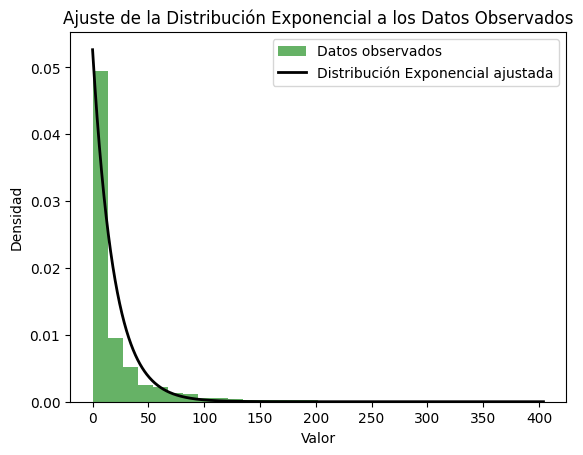


**KS Test Result:**

- Statistic: 0.2896439891939675
- P-value: 7.841409028521749e-267


In [ ]:
loc, scale = 0, 19

samples = stats.expon.rvs(loc=loc, scale=scale, size=10000)
prueba = stats.kstest(number_of_reviews, "expon", (loc, scale))

plt.hist(number_of_reviews, bins=30, density=True, alpha=0.6, color='g', label='Datos observados')

x = np.linspace(min(number_of_reviews), max(number_of_reviews), 1000)
pdf = stats.expon.pdf(x, loc=loc, scale=scale)
plt.plot(x, pdf, 'k-', lw=2, label='Distribución Exponencial ajustada')

plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.title('Ajuste de la Distribución Exponencial a los Datos Observados')
plt.legend()
plt.show()
ks_result_md = f"""
**KS Test Result:**

- Statistic: {prueba.statistic}
- P-value: {prueba.pvalue}
"""

display(Markdown(ks_result_md))

## Test de Hipótesis de Comparación de Medias

Siguiendo la línea de analizar los precios en Airbnb, vamos a categorizar los precios en relacion al tipo de habitación que ofrece un lugar en Airbnb. Para hacer una comparación simple, solo mediremos la media del precio de las habitaciones tipo 1 y habitaciones tipo 2, y buscaremos que la diferencia de estas dos medias sea positiva, haciendonos ver que las habitaciones de tipo 1 podrían tener un mejor estándar que las habitaciones de tipo 2.

El contraste que nos permite evaluar la hipótesis "la media de las habitaciones tipo 1 es mayor que la media de las habitaciones tipo 2" es:

$$
H_0: \mu_1 = \mu_2 \\
H_1: \mu_1 > \mu_2
$$

Se trabajará con la probabilidad de aceptar incorrectamente esta conjetura sea menor al 5% y:
- Se asume homocedasticidad para las varianzas de los dos grupos.

### Desarrollo

Empezamos creando los dos grupos que se van a usar en el contraste:

In [ ]:
prices1= df['price'].loc[df['room_type']==1]
prices2= df['price'].loc[df['room_type']==2]

Creamos las primeras variables muestrales:

In [ ]:
n1 = prices1.count()
var1 = prices1.var()
n2 = prices2.count()
var2 = prices2.var()
degfree = n1+n2-2

Y como se va a aceptar un error tipo i del 5% (una significancia del 5%), tenemos que $\alpha=0.05$

In [ ]:
a = 0.05

Como nuestro contraste de hipótesis presenta homocedasticidad, entonces el estadístico a utilizar cuando $H_0$ es verdadero es el siguiente:


$$
T_0 = \frac{(\overline{X}_1-\overline{X}_2)}{S\sqrt{\frac{1}{n_1}+\frac{1}{n_2}}}
$$

Donde S toma la forma:

$$
S_p=\frac{(n_1-1) \cdot S_1^2+(n_2-1) \cdot S_2^2}{n_1+n_2-2}
$$

Entonces calculamos las medias muestrales y S:

In [ ]:
S=((n1-1)*var1+(n2-1)*var2)/degfree

In [ ]:
mean1 = prices1.mean()
mean2 = prices2.mean()
meand = mean1-mean2

Asumiendo $H_0$ como verdadera, $T_0 \sim \cal{T}$$_{n_1+n_2-2}$

In [ ]:
t0 = meand/(S * sqrt(1/mean1 + 1/mean2))
print(t0)

0.0003007303984562525


Por lo que nuestra región crítica es $\cal{R}$: [ $\cal{t}$$_{\alpha}^{n_1+n_2-2}, \infty$ )

In [ ]:
# t.ppf(probabilidad acumulada, grados de libertad)
reject_limit = t.ppf(1-a,df=degfree)

In [ ]:
print("[",reject_limit,",","infinito )")

[ 1.645900841941544 , infinito )


In [ ]:
print("¿",t0,"<",reject_limit,"?\n>",t0<reject_limit)

¿ 0.0003007303984562525 < 1.645900841941544 ?
> True


Como $T_0$ es efectivamente menor a $t_{\alpha}$, $H_0$ no se rechaza. \\
Al aceptar $H_0$, en caso de que esta hipótesis sea falsa, incurriríamos en un error de tipo II.

Dado que la distribución t es un poco más achatada que la distribución normal el intervalo de confianza va a variar ligeramente si tiene un grado de libertad alto y va a variar de forma muy marcada si tiene un grado de libertad muy bajo

## Regresión Lineal

Considerando el modelo
$Y = aX + b + \epsilon$, con $\epsilon \sim N(0,\sigma^2)$. \\
Variable independiente X: Accomodates \\
Variable dependiente Y: Prices

- Calcular los estimadores máximos verosímiles
- Obtener el coeficiente de detereminación $R^2$ e interpretar el resultado obtenido. A partir de ese resultado indicar que valor toma el coeficiente de correlación
- Adoptando un nivel de significación del 5% encontrar un intervalo que contenga, con probabilidad del 95%, los precios para hospedajes donde el número máximo de personas que pueden hospedarse es 3

**Calcular los estimadores máximos verosímiles $\hat{A}$ y $\hat{B}$**


In [ ]:
prom_accommodates = df['accommodates'].mean()
prom_price = df['price'].mean()

Sxy = np.sum((df['accommodates']-prom_accommodates) * (df['price']-prom_price))

Sxx = np.sum((df['accommodates']-prom_accommodates)**2)
est_A=Sxy/Sxx

print(est_A)
#Habiendo calculado el estimador maximo verosimil A, ahora podemos calcular B a partir de A.
est_B = prom_price - (est_A)*(prom_accommodates)
print(est_B)


3650.114555399915
6291.54839678514


*Coeficiente* de determinacion

In [ ]:
#la cadena entrega la matriz de covarianza
cov_xy = (np.cov(df['accommodates'], df['price']))[0,1]
var_x =  (np.cov(df['accommodates'], df['price']))[0,0]
var_y =  (np.cov(df['accommodates'], df['price']))[1,1]

std_x = np.sqrt(var_x)
std_y = np.sqrt(var_y)

coef_determinacion = (cov_xy / (std_x * std_y))**2

print(coef_determinacion)

#Sabemos que el coeficiente de determinación es simplemente el coeficiente de correlación al cuadrado.
coef_correlacion = coef_determinacion**(1/2)

print(coef_correlacion)

0.19163052624503799
0.4377562406694369


El coeficiente de determinación R^2 (0.192) nos indica que el 19.2% de la variabilidad en los precios de alojamientos puede ser explicada por la variabilidad en la capacidad de alojamiento, lo que tambien significa que el 80% restante de la variabilidad se debe a otros factores no incluidos (otras variables).

Adaptando un α = 0.05, encuentre un intervalo que contenga con probabilidad de 0.95 los precios para hospedajes donde el número máximo de personas que puedan hospedarse es 3.

In [ ]:
import numpy as np
from scipy.stats import t

filtered_df = df[df['accommodates']== 3].copy()

mean_price = filtered_df['price'].mean()
std_dev_price = filtered_df['price'].std()


n = len(filtered_df)
std_error = std_dev_price / np.sqrt(n)


grados_libertad= n - 1

critical_value = t.ppf(0.975, df=grados_libertad)

margin_of_error = critical_value * std_error

lower_bound = mean_price - margin_of_error
upper_bound = mean_price + margin_of_error

print(
    'El intervalo de confianza del 95% para el precio cuando'
    f' accommodates es 3 es: [{lower_bound:.2f}, {upper_bound:.2f}]'
)





El intervalo de confianza del 95% para el precio cuando accommodates es 3 es: [17098.80, 18988.58]
17098.801234729843
